<div style="text-align: center;">
    <i><b>Đại Học Quốc Gia Thành Phố Hồ Chí Minh</b></i>
    <br>
    <i><b>Đại Học Khoa Học Tự Nhiên</b></i>  
    <br>
    <i><b>Khoa Công Nghệ Thông Tin</b></i>
    <br>
    <b>------------o------------</b>
    <br> 
    <b>Khai thác dữ liệu và ứng dụng</b>
</div>

<h1 style="text-align: center; color: red;"><b>LAB 01: TIỀN XỬ LÝ DỮ LIỆU</b></h1>

---

# <font color = red>**I. Thông tin sinh viên**<a class = "anchor" id = "c1"></a></font> 

* <ins>**Full Name:**</ins> Huỳnh Lê Duy Khánh
* <ins>**Student ID:**</ins> 23127384
* <ins>**Class:**</ins> 23KHMT
* <ins>**Email:**</ins> [hldkhanh23@clc.fitus.edu.vn](mailto:hldkhanh23@clc.fitus.edu.vn)
* <ins>**Phone Number:**</ins> 0396010516

# <font color = red>**II. Tự đánh giá độ hoàn thành của các yêu cầu**<a class = "anchor" id = "c2"></a></font>

| No. | Details                  | Completed Rate |
|:---:| ------------------------ |:--------------:|
|  1  | Data Exploration         |    $100\%$     |
|  2  | Data Visualization       |    $100\%$     |
|  3  | Data Cleaning            |    $100\%$     |
|  4  | Dimensionality Reduction |    $100\%$     |
|  5  | Data Normalization       |    $100\%$     |
|  6  | Data Discretization      |    $100\%$      ||

# <font color = red>**III. Cài đặt**<a class = "anchor" id = "c3"></a></font>

## **1. Cài đặt thư viện**<a class = "anchor" id = "c31"></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder, OrdinalEncoder, LabelEncoder
import seaborn as sns
plt.style.use('ggplot')

## **2. Kiểm tra môi trường**<a class = "anchor" id = "c32"></a>

In [3]:
import sys
print(sys.executable)

c:\Users\ADMIN\anaconda3\python.exe


## **3. Dataset** <a class = "anchor" id = "c33"></a>

### **3.1. Thông tin Dataset** <a class = "anchor" id = "c331"></a>

Dataset cities15000 bao gồm thông tin về dân số và địa lý (kinh độ, vĩ độ, múi giờ) của hơn 15000 thành phố trên thế giới. Dataset này có thể được sử dụng cho nhiều mục đích khác nhau như: phân cụm theo vị trí của các thành phố hoặc sử dụng làm dữ liệu cho bản đồ hoặc các ứng dụng AI.

| Tên biến | Vai trò | Kiểu dữ liệu | Nhóm thông tin | Mô tả | Đơn vị | Thiếu dữ liệu |
|---------------------------|----------------|----------------------|----------------------------|----------------------|----------------|--------------------------------|
| geonameid | Feature | Integer | Định danh | Mã định danh duy nhất cho mỗi thành phố trong cơ sở dữ liệu GeoNames. |  | yes |
| name | Feature | String | Địa danh | Tên chính thức của thành phố. |  | no |
| asciiname | Feature | String | Địa danh | Tên thành phố được chuyển sang dạng ASCII. |  | no |
| alternatenames | Feature | String | Địa danh | Danh sách các tên khác hoặc tên thay thế của thành phố. |  | yes |
| latitude | Feature | Float | Vị trí địa lý | Vĩ độ của thành phố. | Độ (°) | yes |
| longitude | Feature | Float | Vị trí địa lý | Kinh độ của thành phố. | Độ (°) | yes |
| feature class | Feature | Categorical | Phân loại địa lý | Nhóm đặc trưng của thực thể địa lý. |  | yes |
| feature code | Feature | Categorical | Phân loại địa lý | Mã chi tiết hơn của loại địa lý. |  | yes |
| country code | Feature | Categorical | Quốc gia | Mã quốc gia theo chuẩn ISO. |  | yes |
| cc2 | Feature | Categorical | Quốc gia phụ | Mã quốc gia phụ, dùng khi một địa danh thuộc nhiều quốc gia. |  | yes |
| admin1 code | Feature | Categorical | Hành chính | Mã cấp hành chính 1. |  | yes |
| admin2 code | Feature | Categorical | Hành chính | Mã cấp hành chính 2. |  | yes |
| admin3 code | Feature | Categorical | Hành chính | Mã cấp hành chính 3. |  | yes |
| admin4 code | Feature | Categorical | Hành chính | Mã cấp hành chính 4. |  | yes |
| population | Feature | Integer | Dân số | Dân số ước tính của thành phố. | Người | yes |
| elevation | Feature | Integer | Địa lý | Độ cao của thành phố so với mực nước biển. | Mét | yes |
| dem | Feature | Integer | Địa hình | Độ cao trung bình từ mô hình số địa hình. | Mét | yes |
| timezone | Feature | Categorical | Thời gian | Múi giờ của thành phố. |  | yes |
| modification date | Feature | Date | Khác | Ngày cập nhật cuối cùng của bản ghi trong cơ sở dữ liệu GeoNames. | YYYY-MM-DD | yes |


### **3.2. Đọc dữ liệu từ dataset cities15000.csv** <a class = "anchor" id = "c332"></a>

In [4]:
path = "cities15000.csv"

df = pd.read_csv(path, encoding="latin1")

In [5]:
print("Thông tin dữ liệu")
df.info()

Thông tin dữ liệu
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23469 entries, 0 to 23468
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   geonameid          23468 non-null  object 
 1   name               23469 non-null  object 
 2   asciiname          23469 non-null  object 
 3   alternatenames     21460 non-null  object 
 4   latitude           23467 non-null  object 
 5   longitude          23467 non-null  object 
 6   feature class      23466 non-null  object 
 7   feature code       23467 non-null  object 
 8   country code       23454 non-null  object 
 9   cc2                238 non-null    object 
 10  admin1 code        23459 non-null  object 
 11  admin2 code        16271 non-null  object 
 12  admin3 code        7118 non-null   object 
 13  admin4 code        2225 non-null   object 
 14  population         23467 non-null  object 
 15  elevation          3800 non-null   object 
 16  dem 

### **3.3. Khám phá dữ liệu** <a class = "anchor" id = "c333"></a>

In [6]:
print("5 dòng đầu của dữ liệu")
df.head()

5 dòng đầu của dữ liệu


,geonameid,name,asciiname,alternatenames,latitude,longitude,feature class,feature code,country code,cc2,admin1 code,admin2 code,admin3 code,admin4 code,population,elevation,dem,timezone,modification date
0,3040051,les Escaldes,les Escaldes,"Ehskal'des-Ehndzhordani,Escaldes,Escaldes-Engo...",42.50729,1.53414,P,PPLA,AD,NaN,8,NaN,NaN,NaN,15853,NaN,1033.0,Europe/Andorra,10/15/08
1,3041563,Andorra la Vella,Andorra la Vella,"ALV,Ando-la-Vyey,Andora,Andora la Vela,Andora ...",42.50779,1.52109,P,PPLC,AD,NaN,7,NaN,NaN,NaN,20430,NaN,1037.0,Europe/Andorra,5/30/10
2,290594,Umm al Qaywayn,Umm al Qaywayn,"Oumm al Qaiwain,Oumm al QaÌøwaÌøn,Um al Kawain...",25.56473,55.55517,P,PPLA,AE,NaN,7,NaN,NaN,NaN,44411,NaN,2.0,Asia/Dubai,10/7/14
3,291074,Ras al-Khaimah,Ras al-Khaimah,"Julfa,Khaimah,RKT,Ra's al Khaymah,Ra's al-Chai...",25.78953,55.9432,P,PPLA,AE,NaN,5,NaN,NaN,NaN,115949,NaN,2.0,Asia/Dubai,12/5/15
4,291696,Khawr Fakkn,Khawr Fakkan,"Fakkan,Fakkn,Khawr Fakkan,Khawr Fakkn,Khaw...",25.33132,56.34199,P,PPL,AE,NaN,6,NaN,NaN,NaN,33575,NaN,20.0,Asia/Dubai,10/25/13


In [7]:
print("5 dòng cuối của dữ liệu")
df.tail()

5 dòng cuối của dữ liệu


,geonameid,name,asciiname,alternatenames,latitude,longitude,feature class,feature code,country code,cc2,admin1 code,admin2 code,admin3 code,admin4 code,population,elevation,dem,timezone,modification date
23464,894701,Bulawayo,Bulawayo,"BUQ,Bulavajas,Bulavajo,Bulavejo,Bulawayo,Gorad...",-20.15,28.58333,P,PPLA,ZW,NaN,9,NaN,NaN,NaN,699385,NaN,1348.0,Africa/Harare,8/3/10
23465,895061,Bindura,Bindura,"Bindura,Bindura Town,Kimberley Reefs,_Ô_ü___«...",-17.30192,31.33056,P,PPLA,ZW,NaN,3,NaN,NaN,NaN,37423,NaN,1118.0,Africa/Harare,8/3/10
23466,895269,Beitbridge,Beitbridge,"Bajtbridz,Bajtbridzh,Beitbridge,Beitbridzas,Be...",-22.21667,30,P,PPL,ZW,NaN,7,NaN,NaN,NaN,26459,NaN,461.0,Africa/Harare,3/12/13
23467,1085510,Epworth,Epworth,Epworth,-17.89,31.1475,P,PPLX,ZW,NaN,10,NaN,NaN,NaN,123250,NaN,1508.0,Africa/Harare,1/19/12
23468,1106542,Chitungwiza,Chitungwiza,"Chitungviza,Chitungwiza,Citungviza,Gorad Chytu...",-18.01274,31.07555,P,PPL,ZW,NaN,10,NaN,NaN,NaN,340360,NaN,1435.0,Africa/Harare,1/20/12


In [8]:
print("Các cột dữ liệu")
df.columns

Các cột dữ liệu


Index(['geonameid', 'name', 'asciiname', 'alternatenames', 'latitude',
       'longitude', 'feature class', 'feature code', 'country code', 'cc2',
       'admin1 code', 'admin2 code', 'admin3 code', 'admin4 code',
       'population', 'elevation', 'dem', 'timezone', 'modification date'],
      dtype='object')

In [9]:
print("Kích thước dữ liệu")
df.shape

Kích thước dữ liệu


(23469, 19)

In [10]:
print("Kiểu dữ liệu")
df.dtypes

Kiểu dữ liệu


geonameid             object
name                  object
asciiname             object
alternatenames        object
latitude              object
longitude             object
feature class         object
feature code          object
country code          object
cc2                   object
admin1 code           object
admin2 code           object
admin3 code           object
admin4 code           object
population            object
elevation             object
dem                  float64
timezone              object
modification date     object
dtype: object

Có thể thấy có nhiều nhiều cột đáng ra có kiểu dữ liệu numeric như `latitude`, `longitude`, `population` và `elevation` nhưng quá trình đọc của pandas bị sai dẫn đến các cột này bị biến thành object, điều này sẽ được sử lý sau.

## **4. Xử lý dữ liệu** <a class = "anchor" id = "c34"></a>

### **4.1. Xử lý các cột dữ liệu bị sai kiểu dữ liệu** <a class = "anchor" id = "c341"></span>

In [11]:
print("Kiểu dữ liệu")
df.dtypes

Kiểu dữ liệu


geonameid             object
name                  object
asciiname             object
alternatenames        object
latitude              object
longitude             object
feature class         object
feature code          object
country code          object
cc2                   object
admin1 code           object
admin2 code           object
admin3 code           object
admin4 code           object
population            object
elevation             object
dem                  float64
timezone              object
modification date     object
dtype: object

Có 5 cột bị sai kiểu dữ liệu:
- `latitude`
- `longitude`
- `population`
- `elevation`

Các cột này nên mang kiểu dữ liệu numeric nhưng do quá trình đọc của pandas sai dẫn đến chúng bị biển thành object

In [12]:
numeric_columns = ['latitude',
                   'longitude', 
                   'population',
                   'elevation',
                   'dem'
                   ]

In [13]:
for column in numeric_columns:
    df[column] = pd.to_numeric(df[column], errors='coerce')

In [14]:
print("Kiểu dữ liệu sau khi đã được xử lý")
df.dtypes

Kiểu dữ liệu sau khi đã được xử lý


geonameid             object
name                  object
asciiname             object
alternatenames        object
latitude             float64
longitude            float64
feature class         object
feature code          object
country code          object
cc2                   object
admin1 code           object
admin2 code           object
admin3 code           object
admin4 code           object
population           float64
elevation            float64
dem                  float64
timezone              object
modification date     object
dtype: object

### **4.2. Xử lý dữ liệu bị thiếu** <a class = "anchor" id = "c342"></span>

In [15]:
print("Số dữ liệu bị thiếu của mỗi cột")
print(df.isnull().sum())

Số dữ liệu bị thiếu của mỗi cột
geonameid                1
name                     0
asciiname                0
alternatenames        2009
latitude                 3
longitude                3
feature class            3
feature code             2
country code            15
cc2                  23231
admin1 code             10
admin2 code           7198
admin3 code          16351
admin4 code          21244
population               3
elevation            19670
dem                      3
timezone                 3
modification date        3
dtype: int64


Có thể thấy ngoại trừ cột là `name` và `asciiname` thì tất cả các cột còn lại đều có dữ liệu bị thiếu
- `alternatenames` thiếu 2009
- `latitude` thiếu 3
- `longitude` thiếu 3
- `feature class` thiếu 3
- `feature code` thiếu 2
- `country code` thiếu 15
- `cc2` thiếu 23231
- `admin1 code` thiếu 10
- `admin2 code` thiếu 7198
- `admin3 code` thiếu 16351
- `admin4 code` thiếu 21244
- `population` thiếu 3
- `elevation` thiếu 19670
- `dem` thiếu 3
- `timezone` thiếu 3
- `modification date` thiếu 3

Dựa vào số lượng dữ liệu bị thiếu ta có thể tính tỷ lệ phần trăm của mỗi dữ liệu này

In [16]:
def summarize_missing_data(data):
    missing_count = data.isna().sum()
    missing_percentage = (missing_count/len(data)) * 100
    missing_summary = pd.DataFrame({'Missing values': missing_count, 'Percentage': missing_percentage})
    
    return missing_summary

In [17]:
print("Dữ liệu bị thiếu\n")
initial_missing_summary = summarize_missing_data(df)
initial_missing_summary = initial_missing_summary.sort_values(by="Percentage")
initial_missing_summary

Dữ liệu bị thiếu



,Missing values,Percentage
name,0,0.000000
asciiname,0,0.000000
geonameid,1,0.004261
feature code,2,0.008522
longitude,3,0.012783
latitude,3,0.012783
feature class,3,0.012783
population,3,0.012783
timezone,3,0.012783
modification date,3,0.012783


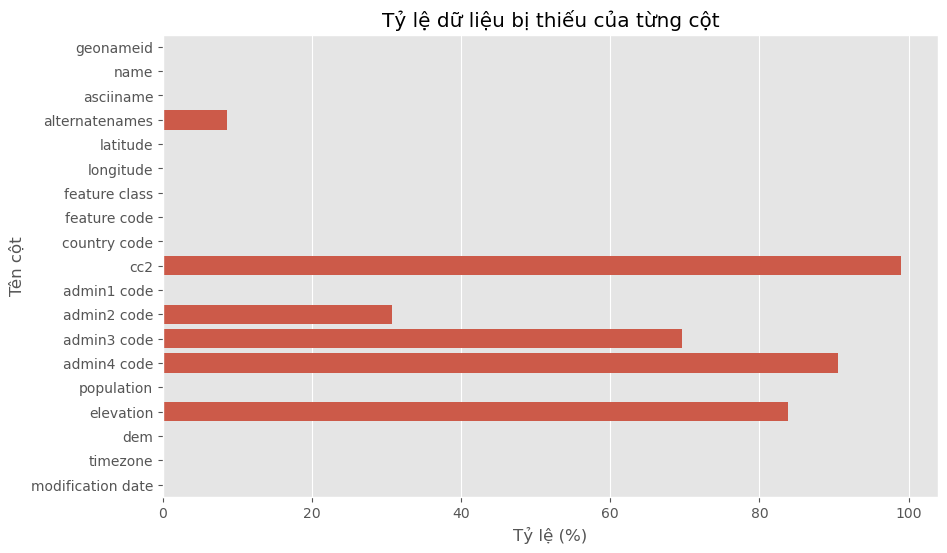

In [18]:
missing_values_percentage = df.isnull().mean() * 100

plt.figure(figsize=(10, 6))
sns.barplot(x=missing_values_percentage, y=missing_values_percentage.index)
plt.title('Tỷ lệ dữ liệu bị thiếu của từng cột')
plt.xlabel('Tỷ lệ (%)')
plt.ylabel('Tên cột')
plt.show()

Có thể thấy rằng tỷ lệ bị của dữ liệu bị thiếu có thể chia thành 3 nhóm:
- Nhóm 1: `admin3 code`, `admin4 code`, `admin2 code`, `elevation`, `cc2` tỷ lệ dữ liệu bị thiếu ở các cột này rất lớn (trên 30%)
- Nhóm 2: `alternatenames` dữ liệu bị thiếu ở cột này ở mức vừa phải (khoảng 8%)
- Nhóm 3: `country code`, `admin1 code`, `population`, `longitude`, `latitude`, `timezone`, `dem`, `modification date`, `feature class`, `feature code` và `geonameid` tỷ lệ dữ liệu bị thiếu ở các cột này mặc dù có nhưng rất nhỏ (dưới 0.1%)

**4.2.1. Nhóm 1 (các dữ liệu bị thiếu trên 30%)** <a class = "anchor" id = "c3421"></span>

Với các cột dữ liệu có tỷ lệ thiếu trên 30% thì rất khó để fill vì vậy ta nên xoá các cột này để tránh gây nhiễu dữ liệu trong các bước sau này

In [19]:
high_missing = [
    col for col, percentage in missing_values_percentage.items()
    if percentage >= 30
]

print("Các cột có tỷ lệ bị thiếu trên 30%:")
print(high_missing)

Các cột có tỷ lệ bị thiếu trên 30%:
['cc2', 'admin2 code', 'admin3 code', 'admin4 code', 'elevation']


In [20]:
df = df.drop(columns=high_missing)

In [21]:
print("Dữ liệu sau khi xoá các cột này")
df.info()

Dữ liệu sau khi xoá các cột này
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23469 entries, 0 to 23468
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   geonameid          23468 non-null  object 
 1   name               23469 non-null  object 
 2   asciiname          23469 non-null  object 
 3   alternatenames     21460 non-null  object 
 4   latitude           23466 non-null  float64
 5   longitude          23466 non-null  float64
 6   feature class      23466 non-null  object 
 7   feature code       23467 non-null  object 
 8   country code       23454 non-null  object 
 9   admin1 code        23459 non-null  object 
 10  population         23466 non-null  float64
 11  dem                23466 non-null  float64
 12  timezone           23466 non-null  object 
 13  modification date  23466 non-null  object 
dtypes: float64(4), object(10)
memory usage: 2.5+ MB


**4.2.2 Nhóm 2 (dữ liệu bị thiếu ở mức 8%)** <a class = "anchor" id = "c3421"></span>

Nhóm này gồm 1 dữ liệu này là `alternatenames` gồm danh sách tên gọi khác của một thành phố, có thể nói trong các mô hình machine learning như linear regression hoặc K-means thì nó không có tác dụng trong việc train các mô hình này nên ta có thể xoá nó.

In [22]:
df = df.drop(columns=["alternatenames"])

In [23]:
print("Dữ liệu sau khi xoá các cột này")
df.info()

Dữ liệu sau khi xoá các cột này
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23469 entries, 0 to 23468
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   geonameid          23468 non-null  object 
 1   name               23469 non-null  object 
 2   asciiname          23469 non-null  object 
 3   latitude           23466 non-null  float64
 4   longitude          23466 non-null  float64
 5   feature class      23466 non-null  object 
 6   feature code       23467 non-null  object 
 7   country code       23454 non-null  object 
 8   admin1 code        23459 non-null  object 
 9   population         23466 non-null  float64
 10  dem                23466 non-null  float64
 11  timezone           23466 non-null  object 
 12  modification date  23466 non-null  object 
dtypes: float64(4), object(9)
memory usage: 2.3+ MB


**4.2.3 Nhóm 3 (dữ liệu bị thiếu ở mức dưới 0.1%)** <a class = "anchor" id = "c3421"></span>

Ở đây ta có thể chia làm 2 nhóm nhỏ hơn
- 3.1 dữ liệu dạng object gồm các cột: `admin1 code`, `geonameid`, `feature class`, `feature code`, `country code` và `timezone`
- 3.2 dữ liệu dạng numeric gồm các cột: `latitude`, `longitude`, `population`, `dem`

Riêng cột dữ liệu `modification date` là dữ liệu dạng ngày tháng sẽ không được xử lý trong bài tập này nên bỏ qua cho nên ta sẽ xoá `modification date` khỏi dữ liệu.

In [24]:
df = df.drop(columns=["modification date"])

Ở đây, chúng ta có nhiều cách thay thế giá trị cho các sample chứa các dữ liệu bị thiếu:
- Mean: Điền bằng giá trị trung bình của cột.
- Median: Điền bằng trung vị.
- Mode: Điền bằng giá trị xuất hiện nhiều nhất.
- Forward/Backward fill: Điền theo giá trị trước hoặc sau.
- KNN imputation: Dự đoán giá trị thiếu dựa trên hàng lân cận, chính xác hơn nhưng tốn tài nguyên.

Ở đây, với dữ liệu thiếu dạng object cách được sử dụng là thay thế các sample dữ liệu bị thiếu bằng mode là một cách đơn giản nhưng nhiệu quả vì nhanh và đơn giản.

Xử lý dữ liệu object

In [25]:
def draw_hist_str(pre_data, data, feature_name):
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    
    pre_counts = pre_data.value_counts().sort_values()
    data_counts = data.value_counts().reindex(pre_counts.index, fill_value=0)

    axes[0].bar(pre_counts.index, pre_counts.values, color='orange')
    axes[0].set_title(f"Original {feature_name}")
    axes[0].set_xlabel(feature_name)
    axes[0].set_xticklabels([])
    axes[0].grid(True, linestyle='--', alpha=0.4)
    axes[0].tick_params(axis='y', labelsize=9)

    axes[1].bar(data_counts.index, data_counts.values, color='blue')
    axes[1].set_title(f"Processed {feature_name}")
    axes[1].set_xlabel(feature_name)
    axes[1].set_xticklabels([])
    axes[1].grid(True, linestyle='--', alpha=0.4)
    axes[1].tick_params(axis='y', labelsize=9)

    plt.tight_layout()
    plt.show()

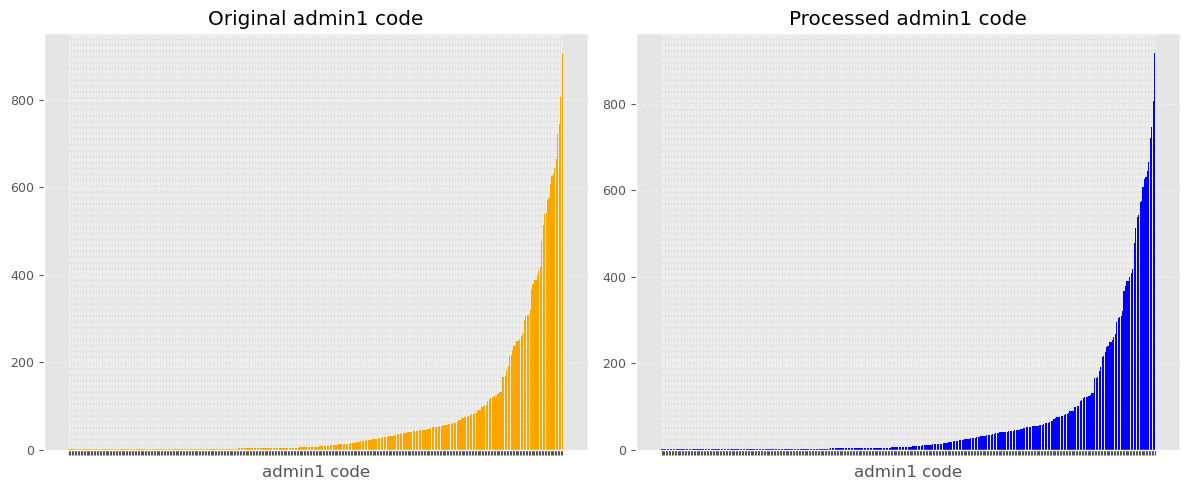

Filled missing values in column 'admin1 code' with mode: 7


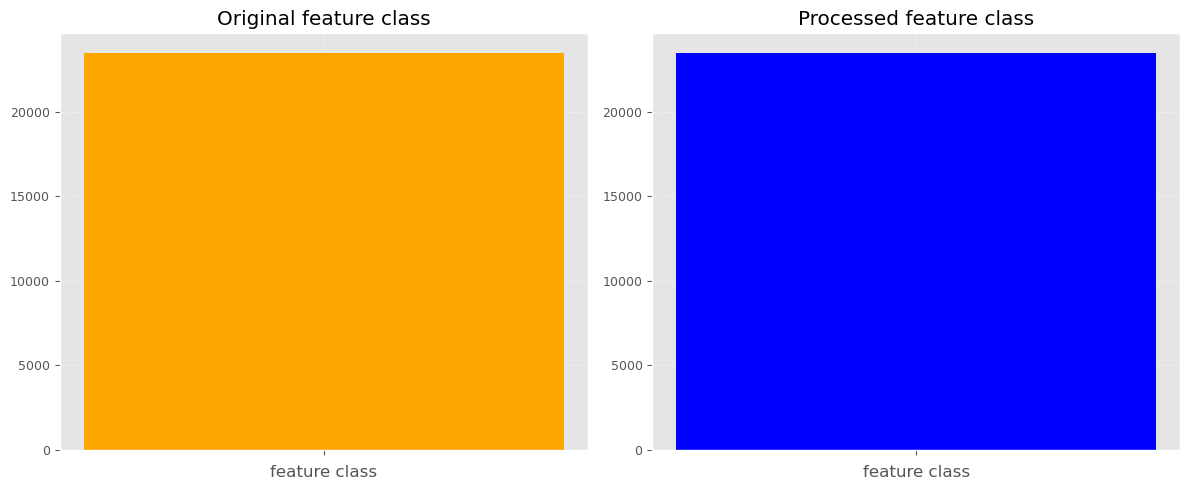

Filled missing values in column 'feature class' with mode: P


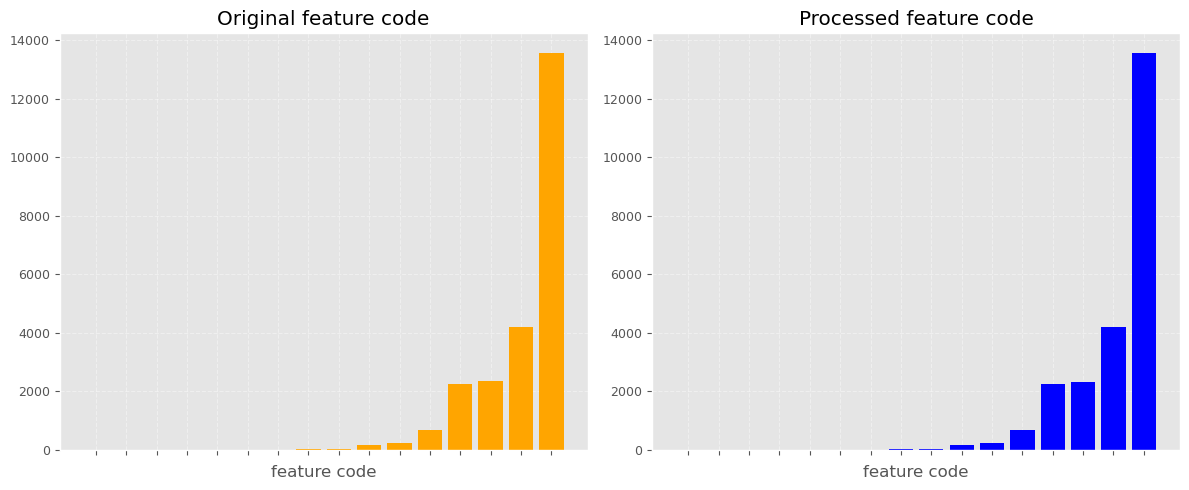

Filled missing values in column 'feature code' with mode: PPL


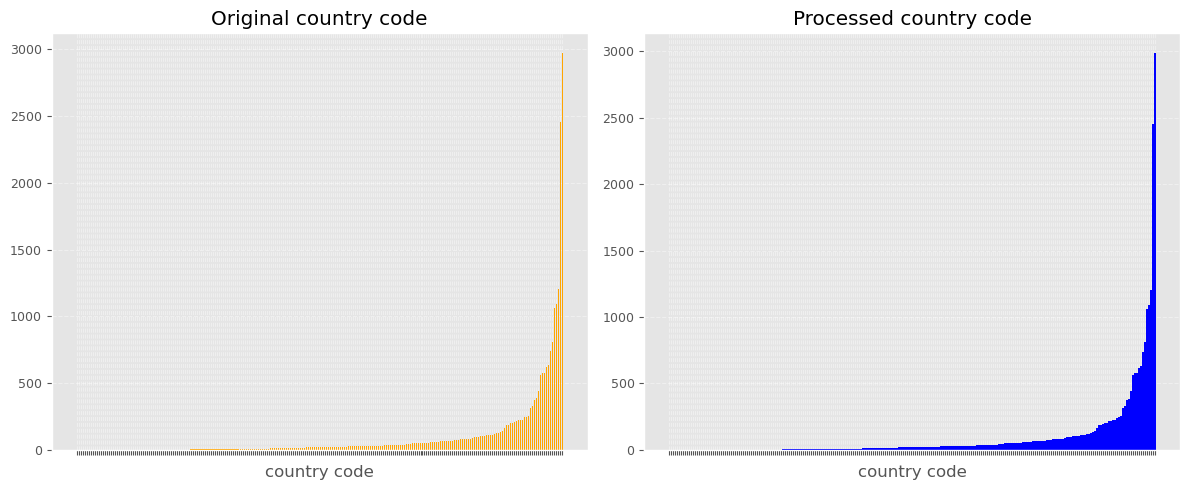

Filled missing values in column 'country code' with mode: US


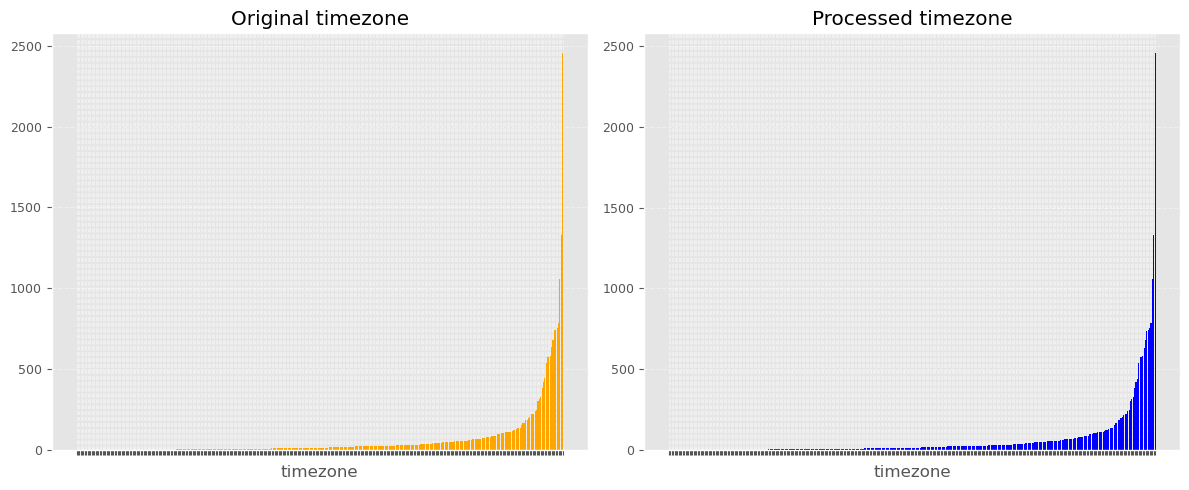

Filled missing values in column 'timezone' with mode: Asia/Kolkata


In [26]:
mode_columns = [
    'admin1 code',
    'feature class',
    'feature code',
    'country code',
    'timezone'
]

for col in mode_columns:
    pre_data = df[col].copy()
    pre_data = pre_data.dropna()
    
    mode = df[col].mode()[0]
    df[col] = df[col].fillna(mode)
    
    draw_hist_str(pre_data, df[col], col)
    
    print(f"Filled missing values in column '{col}' with mode: {mode}")

Có thể thấy khi nhìn vào các biểu đồ trên thì phân phối của dữ liệu gần như không thay đổi, đó là bởi vì tỷ lệ các giá trị bị thiếu ở các cột này là rất nhỏ (dưới 0.1%) và thay thay thế chúng bằng mode sẽ gần như không ảnh hưởng đến phân phối ban đầu của những dữ liệu này.

Riêng đối với cột `geonameid` vì là giá trị unique và cũng chỉ có một dòng bị thiếu nên ta có thể dễ dàng xoá dòng này khỏi dữ liệu, điều này gần như không ảnh hưởng đến kết quả của dữ liệu này.

In [27]:
df = df.dropna(subset=['geonameid'])

Xử lý dữ liệu numeric

Còn với dữ liệu dạng numeric này, cách được chọn để thay thế các dòng chứa dữ liệu bị thiếu là median vì đây là một cách đơn giản để thay thế nhưng rất nhanh và hiệu quả, hẹn chế ảnh hưởng đến phân phối của dữ liệu gốc đặc biệt là khi tỷ lệ dữ liệu bị thiếu ở đây rất nhỏ.

In [28]:
def draw_hist_numeric(pre_data, data, feature_name):
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    axes[0].hist(pre_data, bins=30, color='orange', edgecolor='black')
    axes[0].set_title(f"Original {feature_name}")
    axes[0].set_xlabel(feature_name)
    axes[0].set_ylabel("Frequency")
    axes[0].grid(True, linestyle='--', alpha=0.5)

    axes[1].hist(data, bins=30, color='blue', edgecolor='black')
    axes[1].set_title(f"Processed {feature_name}")
    axes[1].set_xlabel(feature_name)
    axes[1].set_ylabel("Frequency")
    axes[1].grid(True, linestyle='--', alpha=0.5)

    plt.tight_layout()
    plt.show()

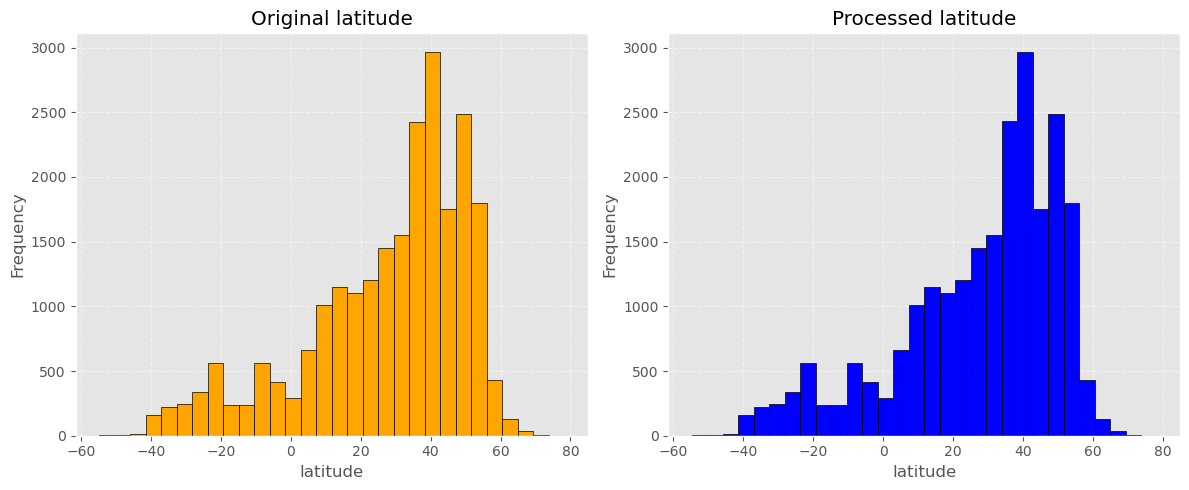

Filled missing values in column 'latitude' with mean: 34.3665


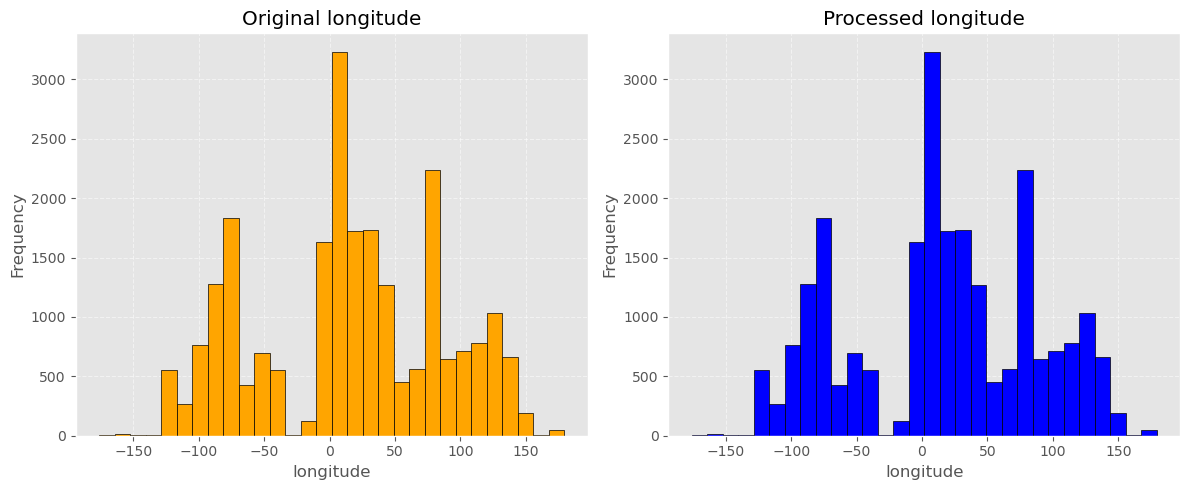

Filled missing values in column 'longitude' with mean: 15.05619


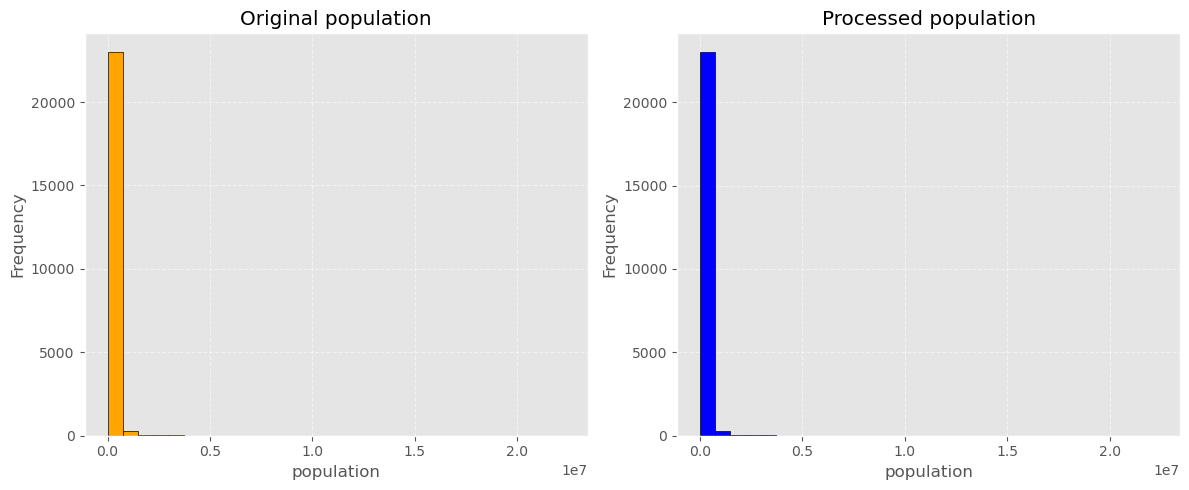

Filled missing values in column 'population' with mean: 35748.0


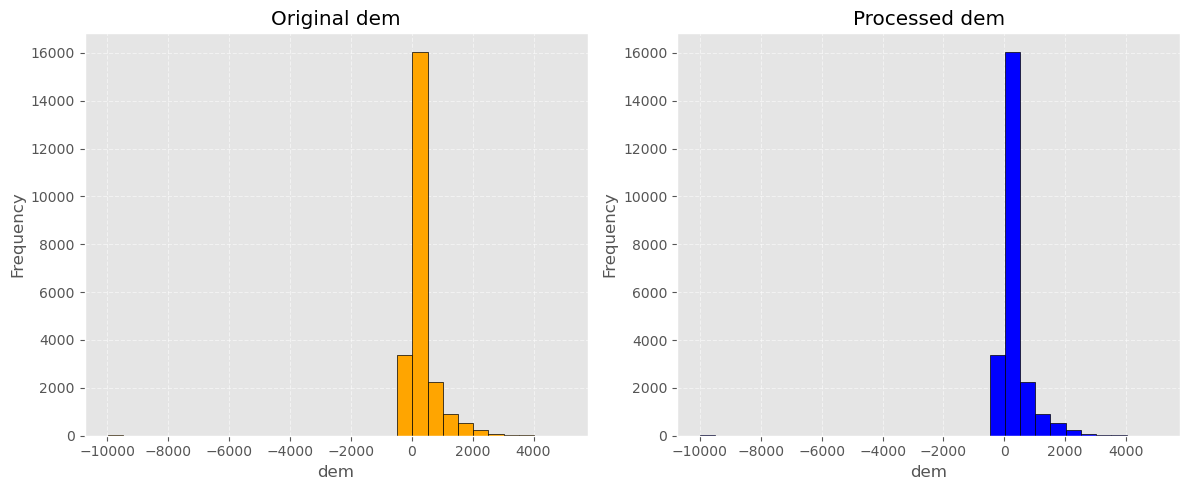

Filled missing values in column 'dem' with mean: 125.0


In [29]:
median_columns = [
    'latitude',
    'longitude',
    'population',
    'dem'
]

for col in median_columns:
    pre_data = df[col].copy()
    pre_data = pre_data.dropna()
    
    median = df[col].median()
    df[col] = df[col].fillna(median)
    
    draw_hist_numeric(pre_data, df[col], col)
    
    print(f"Filled missing values in column '{col}' with mean: {median}")

Cũng tương tự với dữ liệu dạng object vì tỷ lệ các cột bị thiếu là rất nhỏ (dưới 0.1%) nên sau khi thay thế các giá trị này bằng median thì cũng gần như không ảnh hưởng đến phân phối của dữ liệu.

In [30]:
print("Dữ liệu sau khi đã được fill các giá trị bị thiếu")
print(df.info())

Dữ liệu sau khi đã được fill các giá trị bị thiếu
<class 'pandas.core.frame.DataFrame'>
Index: 23468 entries, 0 to 23468
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   geonameid      23468 non-null  object 
 1   name           23468 non-null  object 
 2   asciiname      23468 non-null  object 
 3   latitude       23468 non-null  float64
 4   longitude      23468 non-null  float64
 5   feature class  23468 non-null  object 
 6   feature code   23468 non-null  object 
 7   country code   23468 non-null  object 
 8   admin1 code    23468 non-null  object 
 9   population     23468 non-null  float64
 10  dem            23468 non-null  float64
 11  timezone       23468 non-null  object 
dtypes: float64(4), object(8)
memory usage: 2.3+ MB
None


In [31]:
print("Dữ liệu bị thiếu\n")
after_missing_summary = summarize_missing_data(df)
after_missing_summary = after_missing_summary.sort_values(by="Percentage")
after_missing_summary

Dữ liệu bị thiếu



,Missing values,Percentage
geonameid,0,0.0
name,0,0.0
asciiname,0,0.0
latitude,0,0.0
longitude,0,0.0
feature class,0,0.0
feature code,0,0.0
country code,0,0.0
admin1 code,0,0.0
population,0,0.0


## **5. Chuẩn hoá dữ liệu** <a class = "anchor" id = "c351"></a>

In [32]:
df.describe()

,latitude,longitude,population,dem
count,23468.000000,23468.000000,2.346800e+04,23468.000000
mean,27.771365,15.482522,1.156490e+05,292.931993
std,22.924456,71.017615,4.813824e+05,553.311058
min,-54.800000,-176.174530,0.000000e+00,-9999.000000
25%,14.970010,-45.416393,2.201800e+04,31.000000
50%,34.366500,15.056190,3.574800e+04,125.000000
75%,44.632280,75.029775,7.522400e+04,339.000000
max,78.223340,179.364510,2.231547e+07,5022.000000


In [33]:
def draw_boxplot(pre_data, data, name):
    fig, axes = plt.subplots(2, 1, figsize=(15, 7))
    
    axes[0].boxplot(pre_data, vert=False, patch_artist=True)
    axes[0].set_title(f"Boxplot of {name}")
    axes[0].set_yticks([1], [name])

    axes[1].boxplot(data, vert=False, patch_artist=True)
    axes[1].set_title(f"Boxplot of processed {name}")
    axes[1].set_yticks([1], [name])    

    plt.show()

In [34]:
def draw_distribution(data, title):
    plt.hist(data, bins=30, density=True, alpha=0.6, color='skyblue', edgecolor='black')
    plt.title(title)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.show()

### **5.1. Min Max Scaler** <a class = "anchor" id = "c352"></a>

* **Min–Max Scaling**

$$
X_{\text{scaled}} = \frac{X - X_{\text{min}}}{X_{\text{max}} - X_{\text{min}}}
$$


**Đối tượng áp dụng**
- Các biến có phạm vi giá trị rộng, có giá trị lớn nhất và nhỏ nhất rõ ràng.  
- Thích hợp khi cần đưa dữ liệu về một khoảng cố định (từ `0` đến `1`).

**Ưu điểm**
- Chuẩn hoá dữ liệu về một khoảng xác định, thường là từ `0` đến `1`.  
- Giữ nguyên hình dạng phân phối gốc của dữ liệu, phù hợp khi dữ liệu nằm trong phạm vi xác định và **không có giá trị ngoại lai lớn**.

**Nhược điểm**
- **Nhạy cảm với giá trị ngoại lai**: khi có các giá trị quá lớn hoặc quá nhỏ, các giá trị khác có thể bị nén lại, làm giảm khả năng phân biệt giữa các giá trị trung bình.
c

**Sử dụng MinMaxSCaler cho latitude và longitude vì**  

* **Giá trị có giới hạn**  
  - `latitude` luôn nằm trong khoảng `[-90, 90]`  
  - `longitude` luôn nằm trong khoảng `[-180, 180]`  
  → Đây là phạm vi cố định, không có outliner.

* **Phân phối tương đối đồng đều**  
  - Dữ liệu không bị lệch mạnh, nên việc co giãn tuyến tính vẫn giữ nguyên mối quan hệ không gian.


In [35]:
min_max_scaler = [
    "latitude",
    "longitude"
]

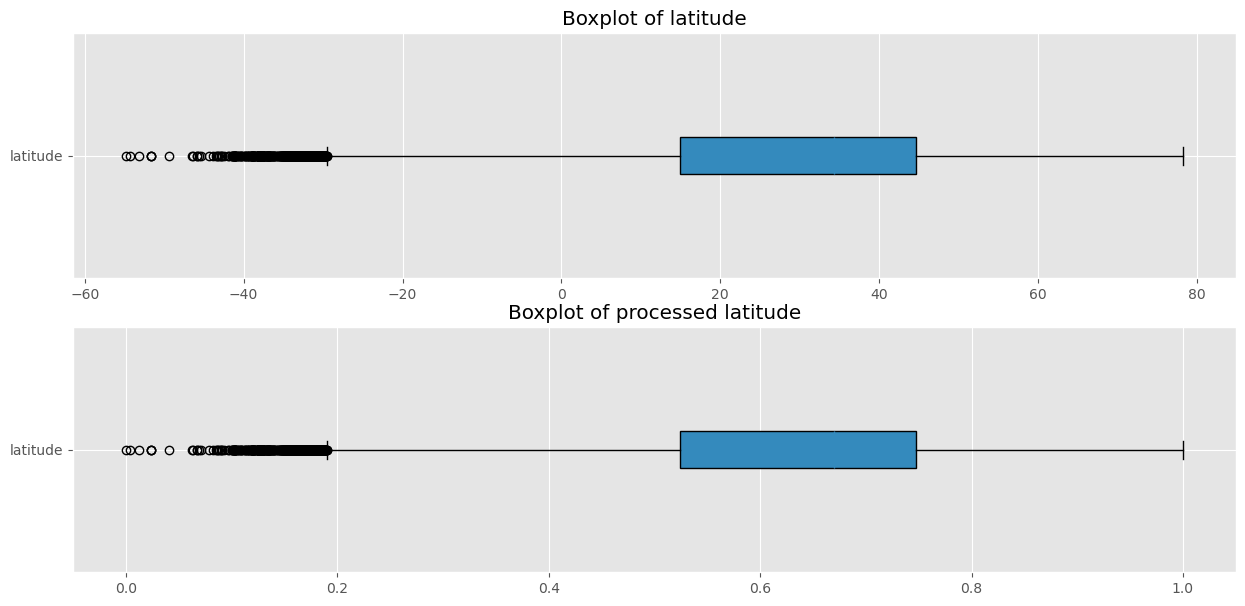

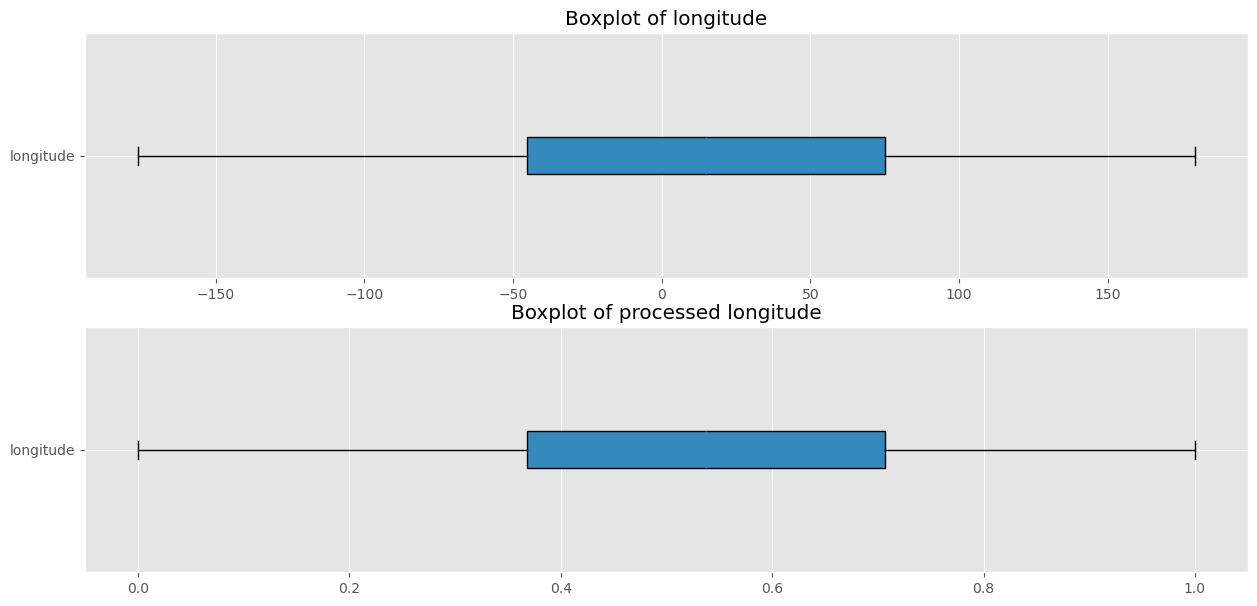

In [36]:
minMaxScaler = MinMaxScaler()

for col in min_max_scaler:
    pre_data = df[col].copy()
    
    df[col] = minMaxScaler.fit_transform(df[[col]])
    draw_boxplot(pre_data, df[col], col)

Biểu đồ phân phối của latitude sau khi áp dụng MinMaxScaler


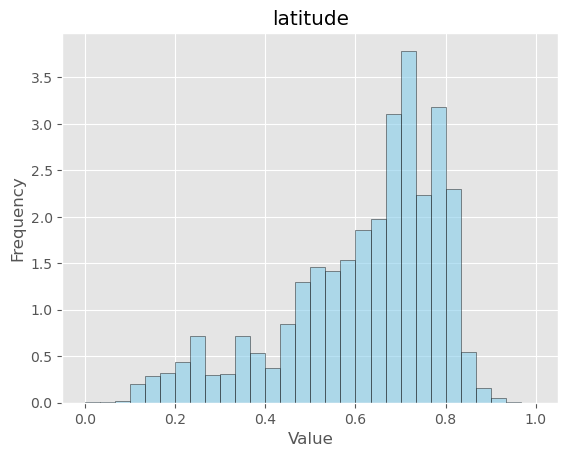

Biểu đồ phân phối của longitude sau khi áp dụng MinMaxScaler


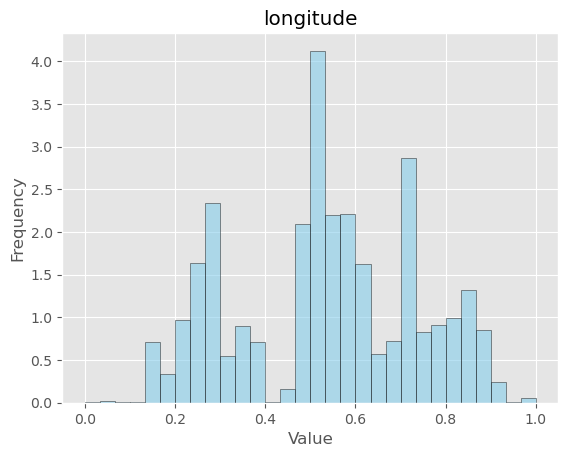

In [37]:
for col in min_max_scaler:
    print(f"Biểu đồ phân phối của {col} sau khi áp dụng MinMaxScaler")
    draw_distribution(df[col], col)

### **5.2. Log Transform** <a class = "anchor" id = "c363"></a>

**Log Transform**

**Công thức:**
$$
X_{\text{scaled}} = \log(1 + X)
$$

**Đối tượng áp dụng**
- Dữ liệu **lệch phải (skewed)**, có một số giá trị rất lớn (outlier) như thu nhập, dân số, v.v.

**Ưu điểm**
- Giảm độ lệch của phân phối, làm dữ liệu gần **phân phối chuẩn (normal)** hơn.  
- Giúp các mô hình tuyến tính hoặc khoảng cách (KNN, Linear Regression, v.v.) hoạt động ổn định hơn.

**Nhược điểm**
- Chỉ áp dụng cho dữ liệu **dương** (phải ≥ 0).  
- Mất tính diễn giải trực tiếp của dữ liệu gốc (đơn vị thay đổi sang log).


**Tại sao dùng Log Transform** cho `population`

* **Phân phối lệch phải mạnh (right-skewed)**  
  - Một vài thành phố có dân số cực lớn (hàng triệu), trong khi hầu hết chỉ vài nghìn → tạo ra **outlier** lớn.

* **Giảm ảnh hưởng của giá trị outliner**  
  - Log biến đổi làm thu nhỏ khoảng cách giữa các giá trị lớn và nhỏ, giúp mô hình không bị chi phối bởi các thành phố đông dân.

* **Giúp phân phối gần chuẩn hơn**  
  - Sau khi log transform, dữ liệu `population` thường trở nên **đối xứng và mượt hơn**, phù hợp cho nhiều thuật toán thống kê hoặc học máy.

* **Giữ được thứ tự tương đối giữa các giá trị**  
  - Biến đổi log không làm thay đổi thứ tự (ranking) giữa các quan sát, chỉ thay đổi tỷ lệ giữa chúng.


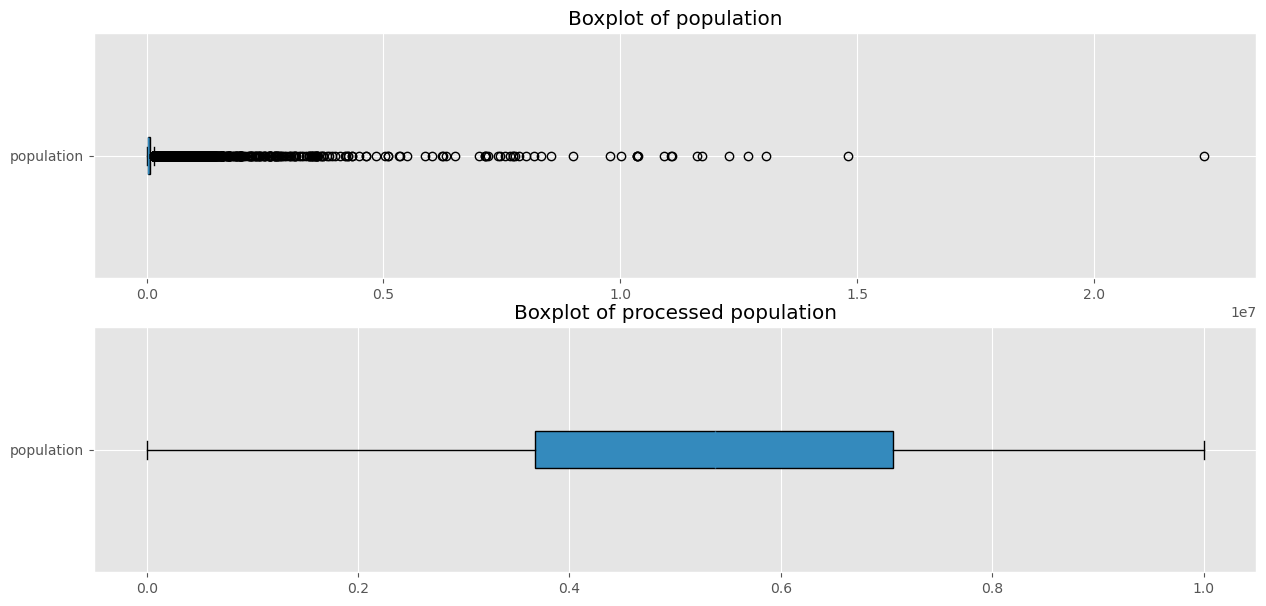

In [38]:
pre_data = df["population"].copy()
df["population"] = np.log(df["population"] + 1)
draw_boxplot(pre_data, df[col], "population")

Biểu đồ phân phối của population sau khi áp dụng Log Transform


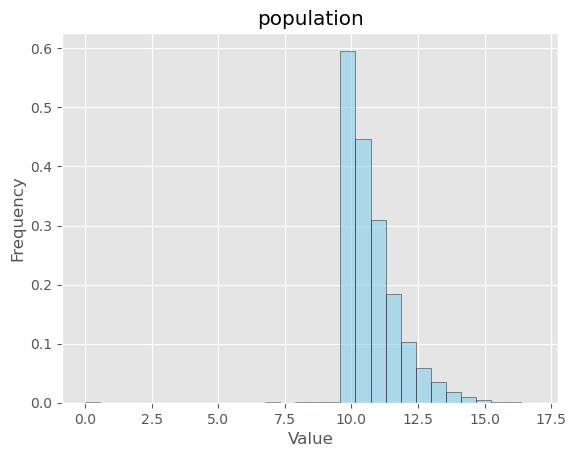

In [39]:
print(f"Biểu đồ phân phối của population sau khi áp dụng Log Transform")
draw_distribution(df["population"], "population")

### **5.3. Standard Scaler** <a class = "anchor" id = "c363"></a>


**Công thức:**
$$
X_{\text{scaled}} = \frac{X - \mu}{\sigma}
$$

**Đối tượng áp dụng**
- Dữ liệu có **phân phối gần chuẩn (normal distribution)** hoặc khi mô hình **nhạy với độ lớn giá trị** (như Linear Regression, SVM, PCA).

**Ưu điểm**
- Đưa dữ liệu về trung tâm 0 và độ lệch chuẩn 1 → giúp mô hình hội tụ nhanh hơn.  
- Giảm ảnh hưởng của thang đo khác nhau giữa các đặc trưng.

**Nhược điểm**
- Nhạy cảm với **outlier**, vì mean và std bị ảnh hưởng mạnh bởi các giá trị cực đoan.


**Tại sao dùng Standard Scaler cho `dem`**

* `dem` có cả giá trị âm và dương → Standard Scaler xử lý tốt.  
* Đưa dữ liệu về trung tâm 0 và độ lệch chuẩn 1 → giúp mô hình học ổn định hơn.  
* Thích hợp vì độ cao phân bố quanh giá trị trung bình, không cần giới hạn trong [0, 1].

In [40]:
standardScaler = StandardScaler()

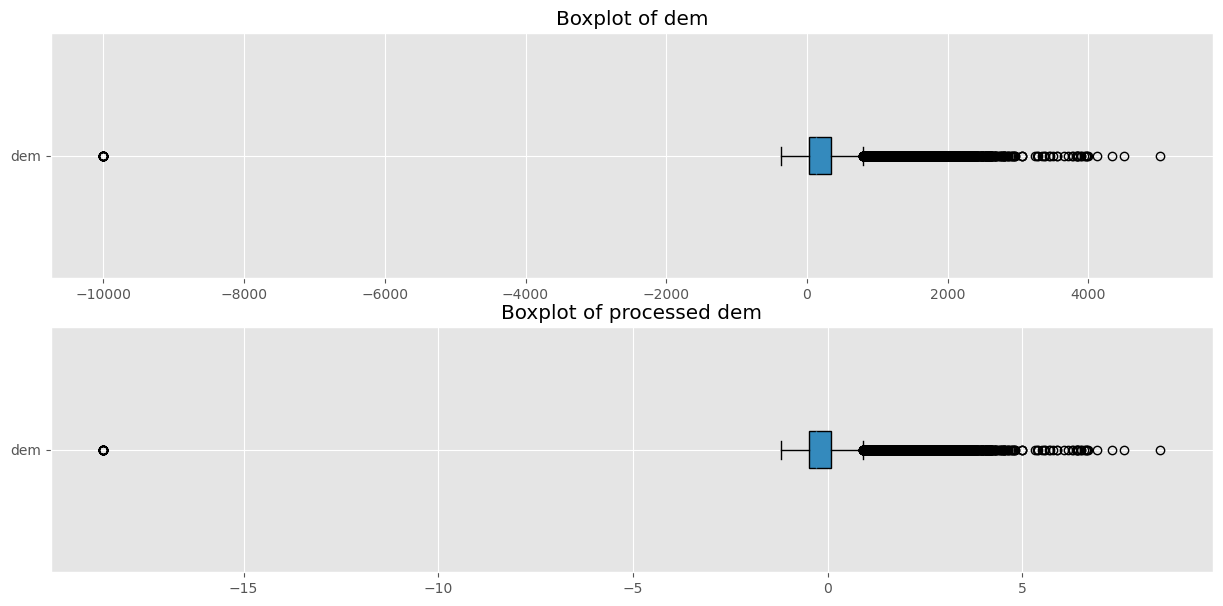

In [41]:
pre_data = df["dem"].copy()
df["dem"] = standardScaler.fit_transform(df[["dem"]])
draw_boxplot(pre_data, df["dem"], "dem")

Biểu đồ phân phối của dem sau khi áp dụng Standard Scaler


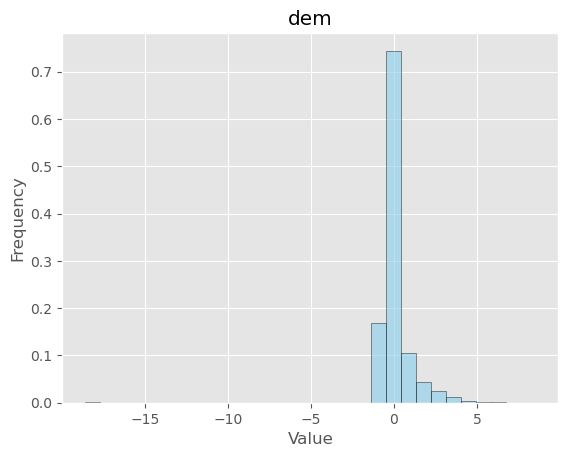

In [42]:
print(f"Biểu đồ phân phối của dem sau khi áp dụng Standard Scaler")
draw_distribution(df["dem"], "dem")

### **5.4. Tổng kết** <a class = "anchor" id = "c364"></a>

In [43]:
df.describe()

,latitude,longitude,population,dem
count,23468.000000,23468.000000,23468.000000,2.346800e+04
mean,0.620728,0.539060,10.748801,-2.785492e-17
std,0.172334,0.199746,1.038487,1.000021e+00
min,0.000000,0.000000,0.000000,-1.860102e+01
25%,0.524494,0.367774,9.999661,-4.734002e-01
50%,0.670307,0.537861,10.484278,-3.035102e-01
75%,0.747480,0.706545,11.228239,8.326056e-02
max,1.000000,1.000000,16.920791,8.547035e+00


| Thuộc tính | Nhận xét |
|-------------|-----------|
| **latitude** | Được chuẩn hóa về khoảng `[0, 1]`, phân phối ổn định quanh trung bình (0.62). |
| **longitude** | Tương tự `latitude`, giá trị nằm trong `[0, 1]`, trung bình là 0.54 |
| **population** | Sau `log`, dữ liệu được nén lại, giảm ảnh hưởng của giá trị cực lớn. |
| **dem** | Sau `StandardScaler`, trung bình ≈ `0` và độ lệch chuẩn ≈ `1`.|

## **6. Encoding** <a class = "anchor" id = "c351"></a>

Mục đích của Encoding là chuyển dổi data từ String sang numeric để phù hợp cho tính toán đặc biệt trong Machine Learning

**Có 2 kĩ thuật Encoding phổ biển**
- **One-Hot Encoding**  
  - Biến mỗi giá trị danh nghĩa (nominal) thành một cột nhị phân (0 hoặc 1).
  - Dùng khi các giá trị **không có thứ bậc** (ví dụ: màu sắc, quốc gia).

- **Ordinal Encoding**  
  - Gán mỗi giá trị hạng mục một số nguyên theo thứ tự.
  - Dùng khi các giá trị **có thứ bậc** (ví dụ: trình độ học vấn, mức độ hài lòng).
- **Label Encoding**  
  - Gán mỗi giá trị hạng mục một **số nguyên duy nhất**.  
  - Dùng khi muốn **giảm số chiều dữ liệu** hoặc khi mô hình có thể xử lý dữ liệu dạng số. 

In [44]:
object_columns = df.select_dtypes(include='object').columns
print(object_columns)

Index(['geonameid', 'name', 'asciiname', 'feature class', 'feature code',
       'country code', 'admin1 code', 'timezone'],
      dtype='object')


In [45]:
for col in object_columns:
    print(f"{col} has {df[col].nunique()} unique values")

geonameid has 23468 unique values
name has 22309 unique values
asciiname has 22247 unique values
feature class has 1 unique values
feature code has 16 unique values
country code has 244 unique values
admin1 code has 339 unique values
timezone has 357 unique values


Ta có thể thấy
- `geonameid`, `name`, `asciiname`, `alternatenames` → Là ID hoặc tên riêng duy nhất, không có thông tin phân loại → **không cần encoding**.  
- `feature class` → Chỉ có 1 giá trị, không mang thông tin phân biệt → **loại bỏ**.  
- `feature code` → Ít giá trị và là danh nghĩa → **One-Hot Encoding**.  
- `country code` → Mỗi quốc gia là danh mục riêng nhưng có nhiều giá trị → **Label Encoding** để giảm số chiều.  
- `admin1 code` → Chứa mã cấp bang hoặc tỉnh → **Label Encoding** giúp giảm số chiều.  
- `timezone` → Nhiều giá trị và không có thứ bậc → **Label Encoding** giúp tránh tăng chiều dữ liệu quá nhiều.

### **6.1. One-Hot Encoding** <a class = "anchor" id = "c364"></a>

In [46]:
one_hot_feature = [
    "feature code",
]

In [47]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded = encoder.fit_transform(df[one_hot_feature])

encoded_df = pd.DataFrame(
        encoded, 
        columns=encoder.get_feature_names_out(one_hot_feature)
    )

df = df.drop(columns=one_hot_feature)
df = pd.concat([df, encoded_df], axis=1)

### **6.2. Label Encoding** <a class = "anchor" id = "c364"></a>

In [48]:
label_features = ["country code", "admin1 code", "timezone"]

In [49]:
for col in label_features:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))

In [50]:
df.dtypes

geonameid              object
name                   object
asciiname              object
latitude              float64
longitude             float64
feature class          object
country code            int64
admin1 code             int64
population            float64
dem                   float64
timezone                int64
feature code_ENG      float64
feature code_PPL      float64
feature code_PPLA     float64
feature code_PPLA2    float64
feature code_PPLA3    float64
feature code_PPLA4    float64
feature code_PPLC     float64
feature code_PPLF     float64
feature code_PPLG     float64
feature code_PPLH     float64
feature code_PPLL     float64
feature code_PPLQ     float64
feature code_PPLR     float64
feature code_PPLS     float64
feature code_PPLW     float64
feature code_PPLX     float64
dtype: object

## **7. Chọn đặc trưng** <a class = "anchor" id = "c351"></a>

In [55]:
def draw_unique(columns_name, num_unique):
    df_unique = pd.DataFrame({'Column': columns_name, 'Unique Count': num_unique})
    df_unique = df_unique.sort_values(by='Unique Count', ascending=False)

    plt.figure(figsize=(12,6))
    plt.bar(df_unique["Column"], df_unique["Unique Count"], color="skyblue", edgecolor="black")
    plt.xticks(rotation=45, ha="right")
    plt.ylabel("Số lượng giá trị unique")
    plt.title("Số lượng giá trị unique của các cột")
    plt.grid(axis="y", alpha=0.3)
    plt.show()


In [51]:
columns = df.columns
num_unique = []

In [52]:
for col in columns:
    nunique = df[col].nunique()
    print(f"{col} has {nunique} unique values")
    
    num_unique.append(nunique)

geonameid has 23468 unique values
name has 22309 unique values
asciiname has 22247 unique values
latitude has 22771 unique values
longitude has 22978 unique values
feature class has 1 unique values
country code has 245 unique values
admin1 code has 340 unique values
population has 19500 unique values
dem has 2050 unique values
timezone has 358 unique values
feature code_ENG has 2 unique values
feature code_PPL has 2 unique values
feature code_PPLA has 2 unique values
feature code_PPLA2 has 2 unique values
feature code_PPLA3 has 2 unique values
feature code_PPLA4 has 2 unique values
feature code_PPLC has 2 unique values


feature code_PPLF has 2 unique values
feature code_PPLG has 2 unique values
feature code_PPLH has 2 unique values
feature code_PPLL has 2 unique values
feature code_PPLQ has 2 unique values
feature code_PPLR has 2 unique values
feature code_PPLS has 2 unique values
feature code_PPLW has 2 unique values
feature code_PPLX has 2 unique values


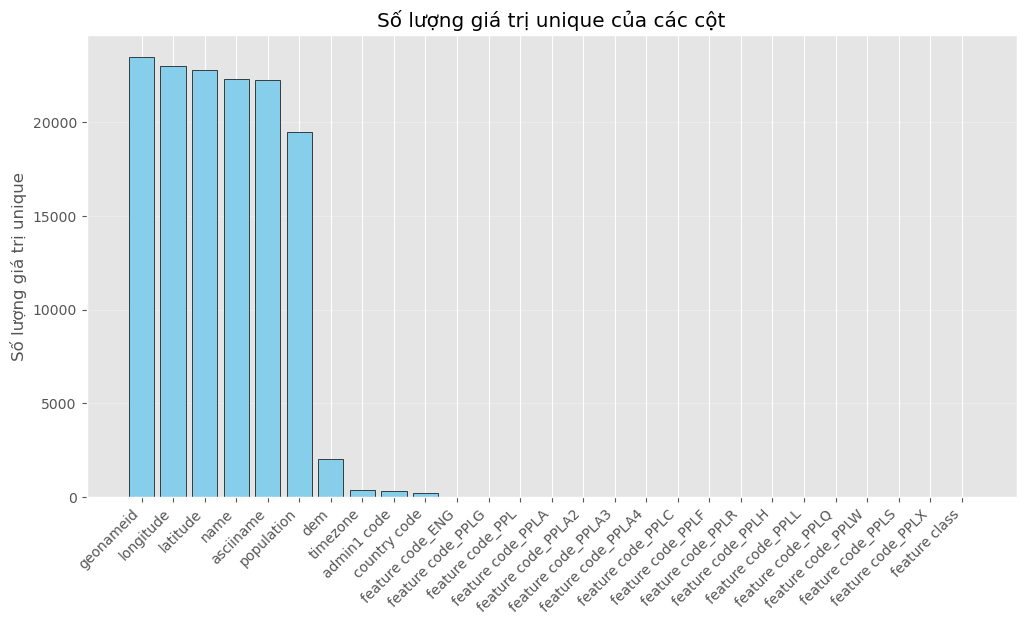

In [54]:
draw_unique(columns, num_unique)

Có thể thấy `geonameid`, `name`, `asciiname` đều là các giá trị duy nhất và không có tác dụng trong các thuật toán Machine Learning nên ta có thể bao qua chúng

Trong khi đó `feature class` cũng chỉ mang một giá trị duy nhất là **P** nên cũng không thể ứng dụng vào Machine learning nên ta cũng bỏ qua.

In [58]:
drop_columns = [
    "geonameid",
    "name",
    "asciiname",
    "feature class"
]

In [60]:
df.drop(columns = drop_columns)

,latitude,longitude,country code,admin1 code,population,dem,timezone,feature code_ENG,feature code_PPL,feature code_PPLA,...,feature code_PPLC,feature code_PPLF,feature code_PPLG,feature code_PPLH,feature code_PPLL,feature code_PPLQ,feature code_PPLR,feature code_PPLS,feature code_PPLW,feature code_PPLX
0,0.731505,0.499829,0,134,9.671177,1.337555,264,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.731509,0.499792,0,100,9.924809,1.344784,264,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.604140,0.651770,1,100,10.701265,-0.525813,188,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.605830,0.652861,1,77,11.660914,-0.525813,188,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.602385,0.653983,1,88,10.421567,-0.493281,188,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23465,0.281891,0.583635,243,54,10.530067,1.491179,23,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23466,0.244944,0.579893,243,100,10.183389,0.303756,23,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
23467,0.277470,0.583120,243,2,11.721978,2.196041,23,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23468,0.276547,0.582918,243,2,12.737762,2.064105,23,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [61]:
df.describe()

,latitude,longitude,country code,admin1 code,population,dem,timezone,feature code_ENG,feature code_PPL,feature code_PPLA,...,feature code_PPLC,feature code_PPLF,feature code_PPLG,feature code_PPLH,feature code_PPLL,feature code_PPLQ,feature code_PPLR,feature code_PPLS,feature code_PPLW,feature code_PPLX
count,23468.000000,23468.000000,23469.000000,23469.000000,23468.000000,2.346800e+04,23469.000000,23468.000000,23468.000000,23468.000000,...,23468.000000,23468.000000,23468.000000,23468.000000,23468.000000,23468.000000,23468.000000,23468.000000,23468.000000,23468.000000
mean,0.620728,0.539060,124.227321,98.989646,10.748801,-2.785492e-17,191.992160,0.000043,0.577851,0.099412,...,0.010269,0.000043,0.000639,0.000256,0.001278,0.000170,0.000043,0.000128,0.000128,0.028763
std,0.172334,0.199746,70.348300,84.784000,1.038487,1.000021e+00,87.435117,0.006528,0.493913,0.299221,...,0.100818,0.006528,0.025274,0.015988,0.035732,0.013055,0.006528,0.011306,0.011306,0.167142
min,0.000000,0.000000,0.000000,0.000000,0.000000,-1.860102e+01,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.524494,0.367774,63.000000,42.000000,9.999661,-4.734002e-01,133.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.670307,0.537861,106.000000,66.000000,10.484278,-3.035102e-01,204.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.747480,0.706545,186.000000,134.000000,11.228239,8.326056e-02,268.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,244.000000,339.000000,16.920791,8.547035e+00,357.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Quan sát mối tương quan của các numeric column ban đầu

In [64]:
numeric_columns = [
    "latitude",
    "longitude",
    "population",
    "dem"
]

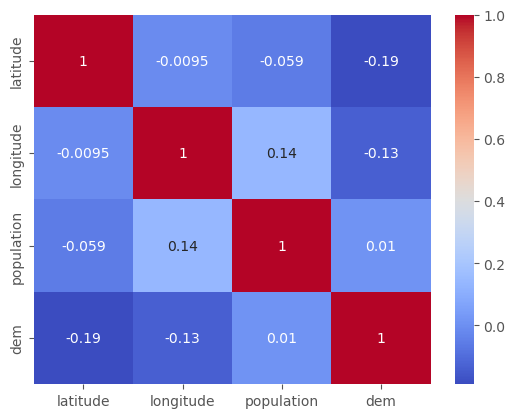

In [65]:
corr = df[numeric_columns].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

- **latitude vs longitude**: Hệ số tương quan ≈ -0.01 → gần như không có mối quan hệ tuyến tính.  
- **latitude vs population**: Hệ số tương quan ≈ -0.06 → rất yếu, không đáng kể.  
- **latitude vs dem**: Hệ số tương quan ≈ -0.19 → tương quan âm yếu, nghĩa là các khu vực có vĩ độ cao có xu hướng có độ cao thấp hơn một chút, nhưng không mạnh.  
- **longitude vs population**: Hệ số tương quan ≈ 0.14 → tương quan dương yếu, nghĩa là dân số hơi tăng theo kinh độ, nhưng vẫn rất yếu.  
- **longitude vs dem**: Hệ số tương quan ≈ -0.13 → tương quan âm yếu, không đáng kể.  
- **population vs dem**: Hệ số tương quan ≈ 0.01 → gần như không có mối quan hệ.  

**Kết luận:** Các biến numeric (`latitude`, `longitude`, `population`, `dem`) **hầu như không có tương quan tuyến tính mạnh** với nhau, nên các mô hình dựa trên tuyến tính có thể không dự đoán tốt nếu chỉ dùng từng biến riêng lẻ.

## **8. Kết luật** <a class = "anchor" id = "c351"></a>

In [ ]:
print(f"Shape of dataset after cleaning: {df.shape}")

shape of dataset after cleaning: (23469, 27)


In [71]:
df.head()

,geonameid,name,asciiname,latitude,longitude,feature class,country code,admin1 code,population,dem,...,feature code_PPLC,feature code_PPLF,feature code_PPLG,feature code_PPLH,feature code_PPLL,feature code_PPLQ,feature code_PPLR,feature code_PPLS,feature code_PPLW,feature code_PPLX
0,3040051,les Escaldes,les Escaldes,0.731505,0.499829,P,0,134,9.671177,1.337555,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3041563,Andorra la Vella,Andorra la Vella,0.731509,0.499792,P,0,100,9.924809,1.344784,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,290594,Umm al Qaywayn,Umm al Qaywayn,0.604140,0.651770,P,1,100,10.701265,-0.525813,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,291074,Ras al-Khaimah,Ras al-Khaimah,0.605830,0.652861,P,1,77,11.660914,-0.525813,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,291696,Khawr Fakkn,Khawr Fakkan,0.602385,0.653983,P,1,88,10.421567,-0.493281,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
